**AnnData**

The materials are presented on :https://anndata.readthedocs.io/en/stable/tutorials/index.html


In [1]:
# Install the required packages
!pip install scanpy anndata pooch

# Import and test
import scanpy as sc
import anndata as ad
import pooch

print("✅ All packages installed successfully!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.1 MB/s eta 0:00:00
✅ All packages installed successfully!


In [2]:
import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix
print(ad.__version__)

0.11.4


**Initializing AnnData**

In [3]:


counts = csr_matrix(np.random.poisson(1, size=(100, 2000)), dtype=np.float32)
adata = ad.AnnData(counts)
adata

adata.X

adata.obs_names = [f"Cell_{i:d}" for i in range(adata.n_obs)]
adata.var_names = [f"Gene_{i:d}" for i in range(adata.n_vars)]
print(adata.obs_names[:10])
print(adata.var_names[:10])


# Subsetting AnnData

adata[["Cell_1", "Cell_10"], ["Gene_5", "Gene_1900"]]

Index(['Cell_0', 'Cell_1', 'Cell_2', 'Cell_3', 'Cell_4', 'Cell_5', 'Cell_6',
       'Cell_7', 'Cell_8', 'Cell_9'],
      dtype='object')
Index(['Gene_0', 'Gene_1', 'Gene_2', 'Gene_3', 'Gene_4', 'Gene_5', 'Gene_6',
       'Gene_7', 'Gene_8', 'Gene_9'],
      dtype='object')


View of AnnData object with n_obs × n_vars = 2 × 2

**Adding aligned metadata : Observation/Variable level**


In [4]:
print(adata.obs.head(2))
print(adata.var.head(2))

ct = np.random.choice(["B", "T", "Monocyte"], size=(adata.n_obs,))
adata.obs["cell_type"] = pd.Categorical(ct)  # Categoricals are preferred for efficiency
adata.obs

Empty DataFrame
Columns: []
Index: [Cell_0, Cell_1]
Empty DataFrame
Columns: []
Index: [Gene_0, Gene_1]


,cell_type
Cell_0,B
Cell_1,Monocyte
Cell_2,Monocyte
Cell_3,T
Cell_4,T
...,...
Cell_95,Monocyte
Cell_96,B
Cell_97,Monocyte
Cell_98,Monocyte


**Subsetting using metadata**

In [5]:
bdata = adata[adata.obs.cell_type == "B"]
print("b cell data")
bdata

b cell data


View of AnnData object with n_obs × n_vars = 29 × 2000
    obs: 'cell_type'

**Observation/variable-level matrices**

In [6]:


# AnnData has the .obsm/.varm attributes. We use keys to identify the different matrices we insert.
# The restriction of .obsm/.varm are that .obsm matrices must length equal to the number of observations as .n_obs and .varm matrices must length equal to .n_vars

adata.obsm["X_umap"] = np.random.normal(0, 1, size=(adata.n_obs, 2))
adata.varm["gene_stuff"] = np.random.normal(0, 1, size=(adata.n_vars, 5))
adata.obsm

adata

AnnData object with n_obs × n_vars = 100 × 2000
    obs: 'cell_type'
    obsm: 'X_umap'
    varm: 'gene_stuff'

In [7]:
print(adata.n_obs) # (number of observations/cells) = 100
print(adata.n_vars) # (number of variables/genes) = 2000

100
2000


In [8]:
# Display the first 5 rows of 'X_umap'
print("First 5 rows of adata.obsm['X_umap']:")
print(adata.obsm['X_umap'][:5, :])

# Display the first 5 values from the first column of 'X_umap'
print("\nFirst 5 values from the first column of adata.obsm['X_umap']:")
print(adata.obsm['X_umap'][:5, 0])

# Display the first 5 values from the second column of 'X_umap'
print("\nFirst 5 values from the second column of adata.obsm['X_umap']:")
print(adata.obsm['X_umap'][:5, 1])

First 5 rows of adata.obsm['X_umap']:
[[ 0.32249979  1.43159687]
 [-1.52147044  0.68296457]
 [ 1.80635406 -2.02409722]
 [-0.47189317  0.45605862]
 [ 0.24293071 -1.90796538]]

First 5 values from the first column of adata.obsm['X_umap']:
[ 0.32249979 -1.52147044  1.80635406 -0.47189317  0.24293071]

First 5 values from the second column of adata.obsm['X_umap']:
[ 1.43159687  0.68296457 -2.02409722  0.45605862 -1.90796538]


In [9]:
# Here are several ways to view the first 4 rows and 4 columns of AnnData objects:
# Convert to DataFrame (Recommended)

# View first 4 rows and 4 columns of the expression matrix
adata.to_df().iloc[:4, :4]

,Gene_0,Gene_1,Gene_2,Gene_3
Cell_0,2.0,0.0,0.0,0.0
Cell_1,0.0,0.0,1.0,1.0
Cell_2,0.0,2.0,1.0,0.0
Cell_3,1.0,2.0,2.0,0.0


In [10]:
# View first 4 rows and 4 columns of the expression matrix

# View raw expression data (first 4x4)
print("Expression matrix (4x4):")
print(adata.X[:4, :4])

# View with cell and gene names
print("\nCell names (first 4):")
print(adata.obs_names[:4])

print("\nGene names (first 4):")
print(adata.var_names[:4])

Expression matrix (4x4):
<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 8 stored elements and shape (4, 4)>
  Coords	Values
  (0, 0)	2.0
  (1, 2)	1.0
  (1, 3)	1.0
  (2, 1)	2.0
  (2, 2)	1.0
  (3, 0)	1.0
  (3, 1)	2.0
  (3, 2)	2.0

Cell names (first 4):
Index(['Cell_0', 'Cell_1', 'Cell_2', 'Cell_3'], dtype='object')

Gene names (first 4):
Index(['Gene_0', 'Gene_1', 'Gene_2', 'Gene_3'], dtype='object')


**Subset AnnData Object**

In [11]:
#  Create a subset of the data
adata_subset = adata[:4, :4]
print(adata_subset)

#  View as DataFrame
adata_subset.to_df()

View of AnnData object with n_obs × n_vars = 4 × 4
    obs: 'cell_type'
    obsm: 'X_umap'
    varm: 'gene_stuff'


,Gene_0,Gene_1,Gene_2,Gene_3
Cell_0,2.0,0.0,0.0,0.0
Cell_1,0.0,0.0,1.0,1.0
Cell_2,0.0,2.0,1.0,0.0
Cell_3,1.0,2.0,2.0,0.0


**View Different Data Layers**

In [12]:
# If you have different data layers

if 'raw' in adata.layers:
    print("Raw counts (4x4):")
    print(adata.layers['raw'][:4, :4])

# View metadata
print("\nCell metadata (first 4 rows):")
print(adata.obs.head(4))

print("\nGene metadata (first 4 rows):")
print(adata.var.head(4))

# Normalized layers
adata.layers["log_transformed"] = np.log1p(adata.X)
adata
adata.X


Cell metadata (first 4 rows):
       cell_type
Cell_0         B
Cell_1  Monocyte
Cell_2  Monocyte
Cell_3         T

Gene metadata (first 4 rows):
Empty DataFrame
Columns: []
Index: [Gene_0, Gene_1, Gene_2, Gene_3]


<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 126666 stored elements and shape (100, 2000)>

**Conversion to DataFrames**

In [13]:
adata.to_df(layer="log_transformed")
adata.write('anndata_results.h5ad', compression="gzip")

**Unstructured data**

In [14]:
# AnnData has .uns, which allows for any unstructured metadata (lists or a dictionaries)
adata.uns["random"] = [1, 2, 3]
adata.uns

OrderedDict([('random', [1, 2, 3])])

**Adding metadata**

In [15]:
obs_meta = pd.DataFrame({
        'time_yr': np.random.choice([0, 2, 4, 8], adata.n_obs),
        'subject_id': np.random.choice(['subject 1', 'subject 2', 'subject 4', 'subject 8'], adata.n_obs),
        'instrument_type': np.random.choice(['type a', 'type b'], adata.n_obs),
        'site': np.random.choice(['site x', 'site y'], adata.n_obs),
    },
    index=adata.obs.index,    # these are the same IDs of observations as above!
)

# Shape (rows, columns)
print("Shape:", obs_meta.shape)

# Column names
print("Columns:", obs_meta.columns.tolist())

# Row names (index)
print("First 5 row names:", obs_meta.index[:5].tolist())

# Data types
print("Data types:\n", obs_meta.dtypes)

# Basic info
obs_meta.info()

adata = ad.AnnData(adata.X, obs=obs_meta, var=adata.var)
print(adata)

Shape: (100, 4)
Columns: ['time_yr', 'subject_id', 'instrument_type', 'site']
First 5 row names: ['Cell_0', 'Cell_1', 'Cell_2', 'Cell_3', 'Cell_4']
Data types:
 time_yr             int64
subject_id         object
instrument_type    object
site               object
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, Cell_0 to Cell_99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   time_yr          100 non-null    int64 
 1   subject_id       100 non-null    object
 2   instrument_type  100 non-null    object
 3   site             100 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.0+ KB
AnnData object with n_obs × n_vars = 100 × 2000
    obs: 'time_yr', 'subject_id', 'instrument_type', 'site'


In [16]:
# Indexing into AnnData will assume that integer arguments to [] behave like .iloc in pandas,
# whereas string arguments behave like .loc. AnnData always assumes string indices.

adata[:5, ['Gene_1', 'Gene_3']]
adata_subset

View of AnnData object with n_obs × n_vars = 4 × 4
    obs: 'cell_type'
    obsm: 'X_umap'
    varm: 'gene_stuff'
    layers: 'log_transformed'

**Reading large data**

In [17]:
adata = ad.read_h5ad('anndata_results.h5ad', backed='r')

In [18]:
# Install all required packages
!pip install gdown torch pyro-ppl numpy scanpy scikit-learn anndata


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 38.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

**Interfacing pytorch models with anndata**

In [19]:
import gdown
import torch
import torch.nn as nn
import pyro
import pyro.distributions as dist
import numpy as np
import scanpy as sc
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from anndata.experimental.pytorch import AnnLoader

**VAE definition**

In [20]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dims, out_dim):
        super().__init__()

        modules = []
        for in_size, out_size in zip([input_dim]+hidden_dims, hidden_dims):
            modules.append(nn.Linear(in_size, out_size))
            modules.append(nn.LayerNorm(out_size))
            modules.append(nn.ReLU())
            modules.append(nn.Dropout(p=0.05))

        modules.append(nn.Linear(hidden_dims[-1], out_dim))
        self.fc = nn.Sequential(*modules)

    def forward(self, *inputs):
        input_cat = torch.cat(inputs, dim=-1)
        return self.fc(input_cat)

In [21]:
class CVAE(nn.Module):
    # The code is based on the scarches trVAE model
    # https://github.com/theislab/scarches/blob/v0.3.5/scarches/models/trvae/trvae.py
    # and on the pyro.ai Variational Autoencoders tutorial
    # http://pyro.ai/examples/vae.html
    def __init__(self, input_dim, n_conds, n_classes, hidden_dims, latent_dim):
        super().__init__()

        self.encoder = MLP(input_dim+n_conds, hidden_dims, 2*latent_dim) # output - mean and logvar of z

        self.decoder = MLP(latent_dim+n_conds, hidden_dims[::-1], input_dim)
        self.theta = nn.Linear(n_conds, input_dim, bias=False)

        self.classifier = nn.Linear(latent_dim, n_classes)

        self.latent_dim = latent_dim

    def model(self, x, batches, classes, size_factors):
        pyro.module("cvae", self)

        batch_size = x.shape[0]

        with pyro.plate("data", batch_size):
            z_loc = x.new_zeros((batch_size, self.latent_dim))
            z_scale = x.new_ones((batch_size, self.latent_dim))
            z = pyro.sample("latent", dist.Normal(z_loc, z_scale).to_event(1))

            classes_probs = self.classifier(z).softmax(dim=-1)
            pyro.sample("class", dist.Categorical(probs=classes_probs), obs=classes)

            dec_mu = self.decoder(z, batches).softmax(dim=-1) * size_factors[:, None]
            dec_theta = torch.exp(self.theta(batches))

            logits = (dec_mu + 1e-6).log() - (dec_theta + 1e-6).log()

            pyro.sample("obs", dist.NegativeBinomial(total_count=dec_theta, logits=logits).to_event(1), obs=x.int())

    def guide(self, x, batches, classes, size_factors):
        batch_size = x.shape[0]

        with pyro.plate("data", batch_size):
            z_loc_scale = self.encoder(x, batches)

            z_mu = z_loc_scale[:, :self.latent_dim]
            z_var = torch.sqrt(torch.exp(z_loc_scale[:, self.latent_dim:]) + 1e-4)

            pyro.sample("latent", dist.Normal(z_mu, z_var).to_event(1))

**Download the data**

In [22]:
url = 'https://drive.google.com/uc?id=1ehxgfHTsMZXy6YzlFKGJOsBKQ5rrvMnd'
output = 'pancreas.h5ad'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1ehxgfHTsMZXy6YzlFKGJOsBKQ5rrvMnd
From (redirected): https://drive.google.com/uc?id=1ehxgfHTsMZXy6YzlFKGJOsBKQ5rrvMnd&confirm=t&uuid=9deb69b3-a62e-41af-a73b-7040d3979481
To: /content/pancreas.h5ad
100%|██████████| 126M/126M [00:01<00:00, 72.6MB/s]


'pancreas.h5ad'

In [23]:
!pwd
!ls -1
!ls -1 /content

/content
anndata_results.h5ad
pancreas.h5ad
sample_data
anndata_results.h5ad
pancreas.h5ad
sample_data


In [24]:
adata = sc.read('pancreas.h5ad')

In [25]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/usr/local/lib/python3.11/dist-packages/scanpy/neighbors/__init__.py:586: UserWarning: You’re trying to run this on 1000 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  X = _choose_representation(self._adata, use_rep=use_rep, n_pcs=n_pcs)


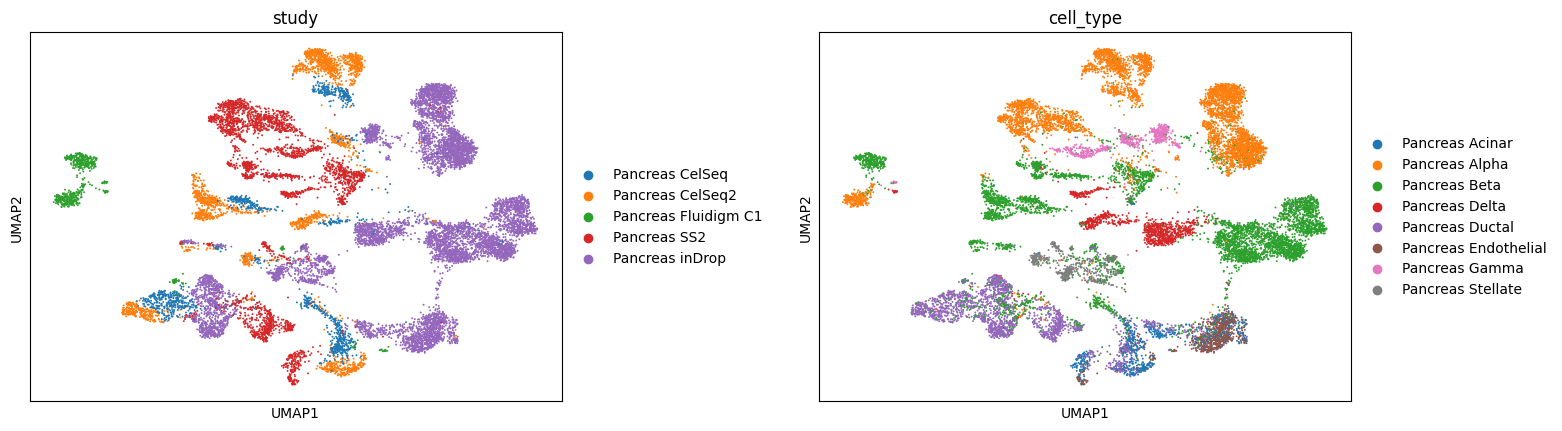

In [26]:
# We can see that the data has strong batch effects. We want to integrate the studies using our VAE model.

sc.pl.umap(adata, color=['study', 'cell_type'], wspace=0.35)

In [27]:
adata.X = adata.raw.X # put raw counts to .X

# For our model we need size factors (library sizes) for each cell for the means of negative binomial reconstruction loss.

adata.obs['size_factors'] = adata.X.sum(1)

# Here we set up the encoders for labels in our AnnData object.
# These encoders will be used by AnnLoader to convert the labels
# on the fly when they are accessed from the dataloader during the training phase.

adata.obs['study'].cat.categories

Index(['Pancreas CelSeq', 'Pancreas CelSeq2', 'Pancreas Fluidigm C1',
       'Pancreas SS2', 'Pancreas inDrop'],
      dtype='object')

In [28]:
from sklearn.preprocessing import OneHotEncoder

# Assuming you want a non-sparse output
encoder_celltype = OneHotEncoder(sparse_output=False, dtype=np.float32)
encoder_celltype.fit(adata.obs['cell_type'].to_numpy()[:, None])

OneHotEncoder(dtype=<class 'numpy.float32'>, sparse_output=False)

In [29]:
adata.obs['cell_type'].cat.categories

Index(['Pancreas Acinar', 'Pancreas Alpha', 'Pancreas Beta', 'Pancreas Delta',
       'Pancreas Ductal', 'Pancreas Endothelial', 'Pancreas Gamma',
       'Pancreas Stellate'],
      dtype='object')

In [30]:
use_cuda = torch.cuda.is_available()

In [31]:
# You can create the converter with a function or a Mapping of functions which will be applied to the values of attributes (.obs, .obsm, .layers, .X) or
# to specific keys of these attributes in the subset object.
# Specify an attribute and a key (if needed) as keys of the passed Mapping and a function to be applied as a value.
# Here we define a converter which will transform the values of the keys 'study' and 'cell_type' of .obs using the encoders created above.

# Here we define a converter which will transform the values of the keys 'study' and 'cell_type' of .obs using the encoders created above.

encoders = {
    'obs': {
        'study': lambda s: encoder_study.transform(s.to_numpy()[:, None]),
        'cell_type': lambda s: encoder_celltype.transform(s.to_numpy()[:, None])
    }
}

In [32]:
# Note that if use_cuda=True, then all numeric values will be converted to tensors and sent to cuda,
# so you don’t need to do any conversion during the training phase.

dataloader = AnnLoader(adata, batch_size=128, shuffle=True, convert=encoders, use_cuda=use_cuda)

dataloader.dataset

AnnCollection object with n_obs × n_vars = 15681 × 1000
  constructed from 1 AnnData objects
    view of obsm: 'X_pca', 'X_umap'
    obs: 'batch', 'study', 'cell_type', 'size_factors'